# Title

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# if you do not have folium installed, pick one of the two commands below to install it

# !pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

# !pip install pyproj
import pyproj

%matplotlib inline

crimeHousing = pd.read_csv("crime-housing-austin-2015.csv")

## Analysis 1

In [ ]:
print('There are',len(crimeHousing['Highest_Offense_Desc'].unique()), 'different types of crime in Austin.')

crimeHousing2 = crimeHousing.copy()
crimeHousing2 = crimeHousing2.dropna()
crimeHousing2['Highest_Offense_Desc'].value_counts().head()

Text(0.5, 1.0, 'Top 20 committed crimes')

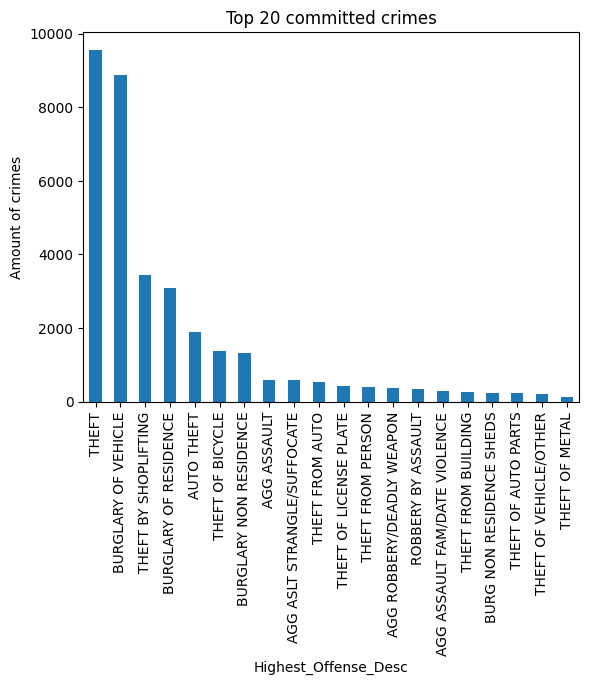

In [13]:
crimeHousing2['Highest_Offense_Desc'].value_counts().head(20).plot(kind='bar')

plt.xlabel("Highest_Offense_Desc")
plt.ylabel("Amount of crimes")
plt.title('Top 20 committed crimes')

## Analysis 2

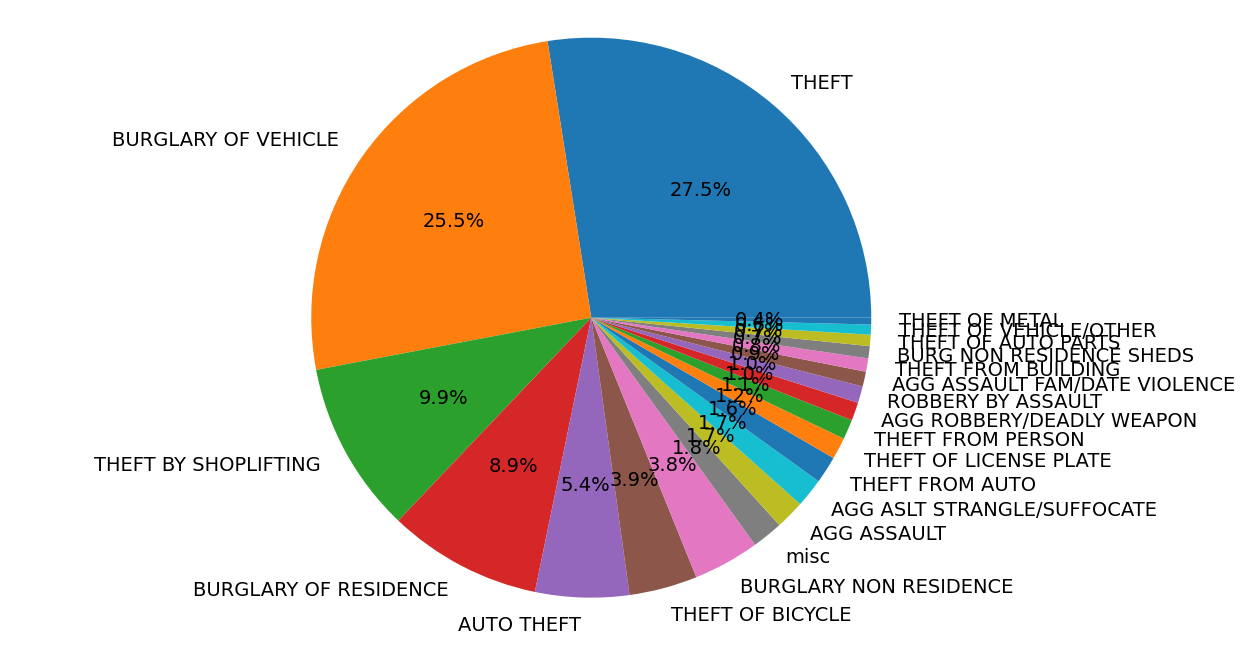

In [16]:
top20 = crimeHousing2['Highest_Offense_Desc'].value_counts().head(20).index
def desc_map(s):
    if s in top20: 
        return s 
    else: 
        return 'misc'
    
crimeHousing2['Description_Short']=crimeHousing['Highest_Offense_Desc'].apply(lambda x: desc_map(x))

fig1, ax1 = plt.subplots(figsize=(15, 8))
labels = crimeHousing2['Description_Short'].value_counts().index
ax1.pie(crimeHousing2['Description_Short'].value_counts().sort_values(ascending=False), labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax1.axis('equal')

plt.show()

## Analysis 3

Text(0.5, 1.0, 'Zip Codes with the highest crime rate')

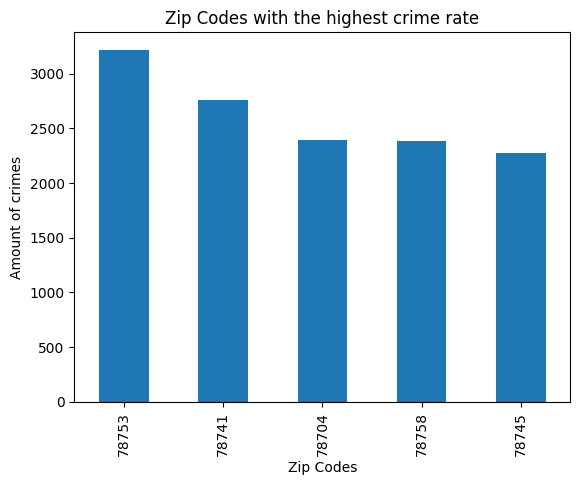

In [17]:
#top 5 zip codes 
crimeHousing2.fillna(0, inplace=True)
crimeHousing2['Zip_Code_Crime'] = crimeHousing2['Zip_Code_Crime'].apply(lambda x: str(x)[:5])
Top5 = crimeHousing2[crimeHousing2['Zip_Code_Crime']!='0.0']['Zip_Code_Crime'].value_counts().sort_values(ascending=False).head(5)

Top5.plot(kind='bar')
plt.xlabel("Zip Codes")
plt.ylabel("Amount of crimes")

plt.title('Zip Codes with the highest crime rate')

## Analysis 4

In [25]:
# Austin latitude and longitude values
latitude = 30.26
longitude = -97.73

# create map and display it
austin_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of Austin
austin_map

import warnings
warnings.filterwarnings("ignore")

# Changing the coordinate format from NAD83 to UTM
fips2401 = pyproj.Proj("+proj=lcc +lat_1=30.11666666666667 +lat_2=31.88333333333333 +lat_0=29.66666666666667 +lon_0=-100.3333333333333 +x_0=700000 +y_0=3000000 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs")
wgs84 = pyproj.Proj("+init=EPSG:4326")

crimeHousing[['lon', 'lat']] = pd.DataFrame(pyproj.transform(fips2401, wgs84, crimeHousing.X_Coordinate.to_numpy(), crimeHousing.Y_Coordinate.to_numpy())).T

# get a random 500 crimes in the crimeHousing dataframe
crimeHousing = crimeHousing.dropna()
limit = 500
sampleCrime = shuffle(crimeHousing)
sampleCrime = crimeHousing.sample(frac = loc[0:limit, :]


NameError: name 'shuffle' is not defined

## Analysis 5

## Analysis 6

## Analysis 7

## Analysis 8